In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AMZN.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500,65420000
1,2013-01-03,12.863500,13.044000,12.818500,12.924000,12.924000,55018000
2,2013-01-04,12.879000,12.990000,12.832500,12.957500,12.957500,37484000
3,2013-01-07,13.148500,13.486500,13.133500,13.423000,13.423000,98200000
4,2013-01-08,13.353500,13.449000,13.178500,13.319000,13.319000,60214000
...,...,...,...,...,...,...,...
2513,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2514,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2515,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
2516,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,12.8040,12.9050,12.6630,12.8655,12.8655,65420000
1,2013-01-03,12.8635,13.0440,12.8185,12.9240,12.9240,55018000
2,2013-01-04,12.8790,12.9900,12.8325,12.9575,12.9575,37484000
3,2013-01-07,13.1485,13.4865,13.1335,13.4230,13.4230,98200000
4,2013-01-08,13.3535,13.4490,13.1785,13.3190,13.3190,60214000


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df

,Open,High,Low,Close,Volume
0,12.804000,12.905000,12.663000,12.865500,65420000
1,12.863500,13.044000,12.818500,12.924000,55018000
2,12.879000,12.990000,12.832500,12.957500,37484000
3,13.148500,13.486500,13.133500,13.423000,98200000
4,13.353500,13.449000,13.178500,13.319000,60214000
...,...,...,...,...,...
2513,83.250000,85.779999,82.930000,85.250000,57433700
2514,84.970001,85.349998,83.000000,83.040001,57284000
2515,82.800003,83.480003,81.690002,81.820000,58228600
2516,82.870003,84.550003,82.550003,84.180000,54995900


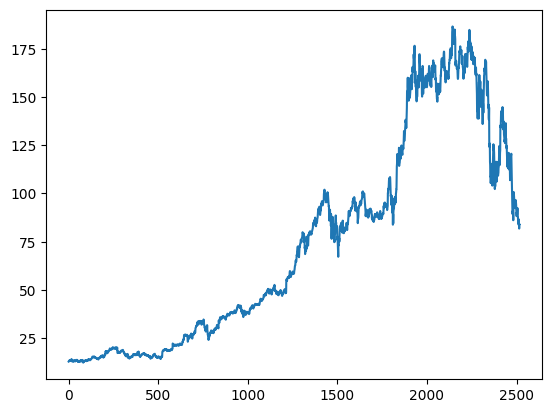

In [5]:
plt.plot(df.Close)

In [6]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1762, 1)
(756, 1)


In [7]:
scaler = MinMaxScaler(feature_range =(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.005069  ],
       [0.00572217],
       [0.0060962 ],
       ...,
       [0.90525765],
       [0.89246791],
       [0.89299826]])

In [8]:
data_training_array.shape

(1762, 1)

In [9]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train.shape

(1662, 100, 1)

In [11]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [12]:
model= Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units =120, activation ='relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 1))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [14]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs =50)

Epoch 1/50
52/52 [==============================] - 18s 260ms/step - loss: 0.0468
Epoch 2/50
52/52 [==============================] - 10s 197ms/step - loss: 0.0073
Epoch 3/50
52/52 [==============================] - 11s 221ms/step - loss: 0.0075
Epoch 4/50
52/52 [==============================] - 11s 209ms/step - loss: 0.0056
Epoch 5/50
52/52 [==============================] - 11s 205ms/step - loss: 0.0053
Epoch 6/50
52/52 [==============================] - 15s 298ms/step - loss: 0.0051
Epoch 7/50
52/52 [==============================] - 17s 325ms/step - loss: 0.0044
Epoch 8/50
52/52 [==============================] - 14s 272ms/step - loss: 0.0044
Epoch 9/50
52/52 [==============================] - 11s 205ms/step - loss: 0.0042
Epoch 10/50
52/52 [==============================] - 10s 189ms/step - loss: 0.0041
Epoch 11/50
52/52 [==============================] - 10s 190ms/step - loss: 0.0045
Epoch 12/50
52/52 [==============================] - 14s 278ms/step - loss: 0.0050
Epoch 13/50
5

In [16]:
model.save('modellstm2.h5')

In [17]:
data_testing.head()

,Close
1762,94.900497
1763,93.748497
1764,95.143997
1765,95.343002
1766,94.598503


In [18]:
data_training.tail(100)

,Close
1662,90.378998
1663,89.246002
1664,91.217003
1665,88.148003
1666,88.806000
...,...
1757,89.460503
1758,93.438499
1759,93.489998
1760,92.344498


In [31]:
past_100_days = data_training.tail(100)

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [32]:
final_df.head()

,Close
0,90.378998
1,89.246002
2,91.217003
3,88.148003
4,88.806000


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08170842],
       [0.07089228],
       [0.08970843],
       [0.06041024],
       [0.06669181],
       [0.07454382],
       [0.0857848 ],
       [0.07874903],
       [0.08932657],
       [0.08031467],
       [0.05404273],
       [0.06323118],
       [0.05987083],
       [0.06102598],
       [0.07159871],
       [0.06677294],
       [0.07324067],
       [0.07838624],
       [0.09752701],
       [0.09408546],
       [0.09305442],
       [0.08789931],
       [0.089064  ],
       [0.09887779],
       [0.09686831],
       [0.08183253],
       [0.08885401],
       [0.08642442],
       [0.08835277],
       [0.07530275],
       [0.07107364],
       [0.05021931],
       [0.06297341],
       [0.04937444],
       [0.04250576],
       [0.0474986 ],
       [0.04737449],
       [0.03667285],
       [0.04201413],
       [0.04928376],
       [0.04594731],
       [0.03298788],
       [0.04085425],
       [0.04002845],
       [0.04559407],
       [0.04774682],
       [0.06252002],
       [0.067

In [34]:
input_data.shape

(856, 1)

In [35]:
x_test =[]
y_test =[]
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [37]:
y_predicted = model.predict(x_test)
y_predicted.shape

24/24 [==============================] - 4s 76ms/step


(756, 1)

In [38]:
y_test

array([0.12487289, 0.11387533, 0.12719746, 0.12909726, 0.1219899 ,
       0.12632397, 0.11778462, 0.12167009, 0.11123575, 0.10769398,
       0.11529304, 0.10898278, 0.12200418, 0.11983715, 0.11846241,
       0.10751263, 0.0916177 , 0.10350784, 0.10577517, 0.1118276 ,
       0.17771751, 0.17556002, 0.19726396, 0.1925862 , 0.19753126,
       0.21139754, 0.23747384, 0.24553584, 0.24992722, 0.24509192,
       0.23793205, 0.24786041, 0.2548055 , 0.24663367, 0.21936412,
       0.17798961, 0.1605434 , 0.16381307, 0.11832876, 0.11806627,
       0.15157448, 0.13011395, 0.16201829, 0.13729291, 0.12634305,
       0.07838151, 0.12191831, 0.08804731, 0.01919321, 0.07093045,
       0.02517885, 0.08183253, 0.09241006, 0.11672022, 0.10009019,
       0.12717364, 0.14496349, 0.11906388, 0.15230952, 0.1258705 ,
       0.15634773, 0.14955538, 0.12949821, 0.1348108 , 0.12896834,
       0.17240492, 0.17909225, 0.19408025, 0.19396567, 0.25416106,
       0.3087909 , 0.32041856, 0.36839444, 0.35255203, 0.36143

In [39]:
y_predicted

array([[0.07377887],
       [0.07522506],
       [0.07696009],
       [0.07897067],
       [0.08119197],
       [0.08353534],
       [0.08593553],
       [0.08835044],
       [0.09078003],
       [0.09318647],
       [0.09554702],
       [0.0978616 ],
       [0.10012387],
       [0.10232678],
       [0.10445295],
       [0.1064871 ],
       [0.10840997],
       [0.11019788],
       [0.11182791],
       [0.11329164],
       [0.1145893 ],
       [0.11578567],
       [0.11699094],
       [0.11835064],
       [0.11998021],
       [0.12189357],
       [0.12413166],
       [0.12675704],
       [0.12984096],
       [0.13358548],
       [0.13810138],
       [0.14335422],
       [0.14933217],
       [0.15587163],
       [0.16279268],
       [0.17000048],
       [0.17724669],
       [0.18421823],
       [0.19058335],
       [0.19597968],
       [0.20014516],
       [0.20297879],
       [0.20447497],
       [0.20469901],
       [0.20377114],
       [0.20189552],
       [0.19928034],
       [0.196

In [40]:
scaler.scale_

array([0.00954649])

In [41]:
scale_factor = 1/0.00251232
y_predicted = y_predicted*scale_factor
y_test = y_test * scale_factor

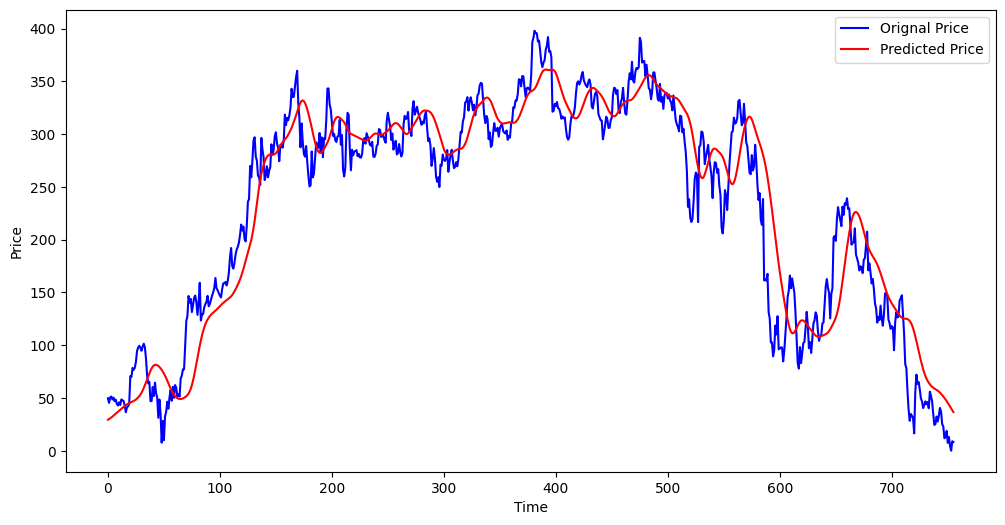

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [43]:
print(type(past_100_days))
print(type(data_testing))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
